## Zadanie 1: Sieć neuronowa Hopfielda

In [281]:
import matplotlib.pyplot as plt
import numpy as np

In [282]:
def rysuj_iteracje(test_bitmap, iteration):
    fig, ax = plt.subplots()
    
    ax.imshow(test_bitmap, cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Iteracja nr. {iteration + 1}')
    
    plt.show()

In [283]:
class HopfieldNN:
    def __init__(self, height, width):
        """
        Najpierw należy zainicjować sieć neuronową za pomocą metody HopfieldNN(...), 
        w tym celu należy stworzyć tablicę z wagami sieci o rozmiarze n x n 
        (n to liczba neuronów; n = szerokość * wysokość) wypełnioną początkowo zerami.
        """
        
        n = height * width
        self.weights = np.zeros((n, n))

    def train_image(self, img):
        """
        Należy kilkukrotnie narysować różne obrazki, a następnie nauczyć sieć za pomocą 
        metody HopfieldNN.train_image(...). W tym celu trzeba zastosować wzór korekcji 
        wag neuronów napisany uprzednio. Należy zwrócić uwagę, że wartości podanych 
        wejść muszą mieć wartość -1 albo +1.
        """
        
        img = 2 * np.array(img).flatten() - 1
        n = len(img)
        
        for i in range(n):
            for j in range(n):
                if i != j:  # gdzie i oraz j to numery różnych neuronów
                    self.weights[i, j] += img[i] * img[j] / n  # Uczenie (korekcja) wag neuronów za pomocą reguły Hebba

    def recognize_image(self, img, max_retries=100):
        """
        Należy kilkukrotnie narysować obrazki trochę różniące się od poprzednio nauczonych, 
        a następnie uruchomić funkcję rozpoznania/korekcji obrazu metodą HopfieldNN.recognize_image(...). 
        Może się zdarzyć, iż za pierwszym razem sieć nie naprawi całego obrazka, 
        wtedy należy powtórzyć proces rozpoznawania. Za każdym razem sieć Hopfielda powinna finalnie naprawić obraz, 
        czyli podać jego wersję w postaci tej samej co podczas uczenia, albo też jego negatyw.
        """
        
        original_img = img.copy()
        current_result = False
        
        img = 2 * np.array(img).flatten() - 1
        n = len(img)
        
        for iteration in range(max_retries):
            prev_iter_img = img.copy()
            for i in range(n):
                suma = 0
                for j in range(n):
                    if i != j:
                        suma += self.weights[i, j] * img[j]  # 1. Sumowane są wejścia pomnożone przez odpowiednie wagi
                img[i] = 1 if suma >= 0 else -1  # 2. Liczona jest wartość wyjścia tego neuronu za pomocą progu 0
            
            if np.array_equal(prev_iter_img, img):
                break
            
            current_img = (img + 1) // 2
            current_result = current_img.reshape(int(np.sqrt(n)), int(np.sqrt(n)))
            rysuj_iteracje(current_result, iteration)
        
        if np.array_equal(original_img, img):
            return False
        
        return current_result

Bitmapy wzorcowe

In [284]:
one = np.array([
    [1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
])

ex = np.array([
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1]
])

plus = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
])

Bitmapy testowe

In [285]:
test1 = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
])

test2 = np.array([
    [1, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 0, 0, 1]
])

test3 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0]
])

test4 = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1]
])

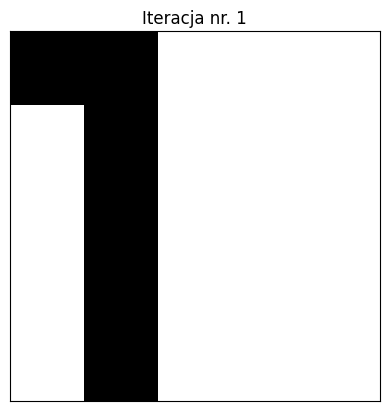

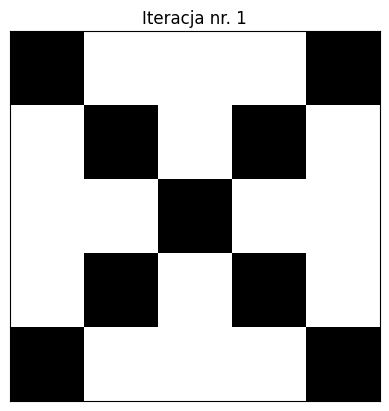

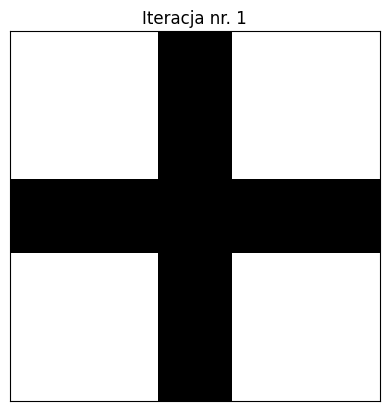

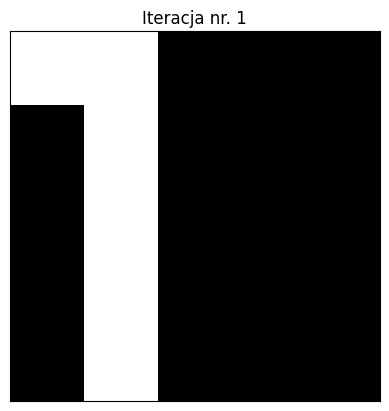

[array([[1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0]]),
 array([[1, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 0, 0, 1]]),
 array([[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]]),
 array([[0, 0, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1]])]

In [286]:
bitmaps = [one, ex, plus]
test_bitmaps = [test1, test2, test3, test4]

hopfield_obj = HopfieldNN(height=5, width=5)
[hopfield_obj.train_image(bitmap) for bitmap in bitmaps]
[hopfield_obj.recognize_image(bitmap) for bitmap in test_bitmaps]